In [13]:
import Pkg
Pkg.activate("../../../.")
include("../../../LogLoss/RealRealHighDimension.jl")
include("../../../Interpolation/ForecastingMainNew.jl");
using JLD2
using DataFrames

  Activating project at `~/Desktop/QuantumInspiredML`


In [4]:
svpath_ns = "../../../Data/difficult-synthetic/mps_saves/mvar2_tauvar3_legendre_ns_d20_chi80.jld2";
dloc =  "../../../Data/difficult-synthetic/datasets/noisy_trendy_sine_eta_01_m_var2_tau_var3.jld2";

In [5]:
f = jldopen(dloc, "r")
    X_train = read(f, "X_train")
    y_train = read(f, "y_train")
    X_test = read(f, "X_test")
    y_test = read(f, "y_test")
close(f)

In [6]:
f = jldopen(svpath_ns, "r")
    mps_ns = read(f, "mps")
    opts_ns = read(f, "opts")
close(f)
opts_ns, _... = safe_options(opts_ns, nothing, nothing)

fc_ns = load_forecasting_info_variables(mps_ns, X_train, y_train, X_test, y_test, opts_ns);


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                         Summary:

 - Dataset has 300 training samples and 200 testing samples.
 - 1 class(es) was detected. Slicing MPS into individual states...
 - Time independent encoding - Legendre_No_Norm - detected.
 - d = 20, chi_max = 80

 Created 1 forecastable struct(s) containing class-wise mps and test samples.


In [33]:
mode_range=(-1,1)
xvals=collect(range(mode_range...; step=1E-4))
mode_index=Index(opts_ns.d)
xvals_enc= [get_state(x, opts_ns) for x in xvals]
xvals_enc_it=[ITensor(s, mode_index) for s in xvals_enc];

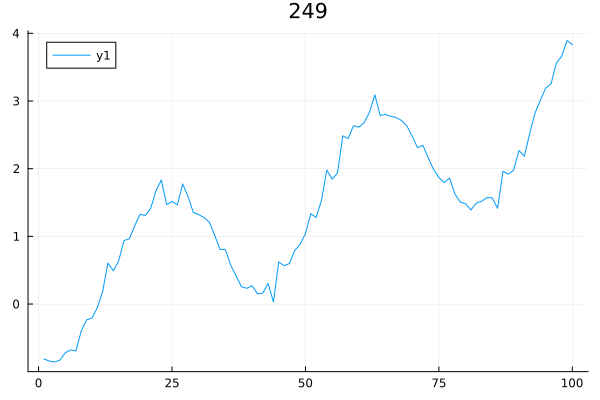

In [98]:
idx = rand(1:size(X_train, 1))
plot(X_train[idx, :], title="$idx")

In [80]:
max_jump=nothing
class = 0
interp_sites = collect(25:75)
instance_idx = 197
stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, instance_idx, interp_sites, :directMode; 
    NN_baseline=true, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, 
    xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);


(i, x_prev, mx) = (1, 0.14932604517284664, 0.132)
(i, x_prev, mx) = (2, 0.132, 0.1008)
(i, x_prev, mx) = (3, 0.1008, 0.0647)
(i, x_prev, mx) = (4, 0.0647, 0.0318)
(i, x_prev, mx) = (5, 0.0318, 0.0073)
(i, x_prev, mx) = (6, 0.0073, -0.0147)
(i, x_prev, mx) = (7, -0.0147, -0.0294)
(i, x_prev, mx) = (8, -0.0294, -0.0243)
(i, x_prev, mx) = (9, -0.0243, -0.0125)
(i, x_prev, mx) = (10, -0.0125, 0.0274)
(i, x_prev, mx) = (11, 0.0274, 0.0519)
(i, x_prev, mx) = (12, 0.0519, 0.1022)
(i, x_prev, mx) = (13, 0.1022, 0.1394)
(i, x_prev, mx) = (14, 0.1394, 0.2123)
(i, x_prev, mx) = (15, 0.2123, 0.2567)
(i, x_prev, mx) = (16, 0.2567, 0.3165)
(i, x_prev, mx) = (17, 0.3165, 0.3959)
(i, x_prev, mx) = (18, 0.3959, 0.4206)
(i, x_prev, mx) = (19, 0.4206, 0.4668)
(i, x_prev, mx) = (20, 0.4668, 0.5219)
(i, x_prev, mx) = (21, 0.5219, 0.5472)
(i, x_prev, mx) = (22, 0.5472, 0.5539)
(i, x_prev, mx) = (23, 0.5539, 0.566)
(i, x_prev, mx) = (24, 0.566, 0.5713)
(i, x_prev, mx) = (25, 0.5713, 0.577)
(i, x_prev, mx) = 

In [60]:
interp_sites = collect(25:75)
maes_mps = zeros(size(X_test, 1))
maes_nn = zeros(size(X_test, 1))
for i in 1:size(X_test, 1)
    println("Computing instance $i")
    stats, p1_ns = any_interpolate_single_timeseries(fc_ns, class, i, interp_sites, :directMode; 
    NN_baseline=false, X_train=X_train, y_train=y_train, n_baselines=1, plot_fits=true, mode_range=mode_range, 
    xvals=xvals, mode_index=mode_index, xvals_enc=xvals_enc, xvals_enc_it=xvals_enc_it, max_jump=max_jump);
    maes_mps[i] = stats[:MAE]
    maes_nn[i] = stats[:NN_MAE]
end

Computing instance 1
(i, x_prev, mx) = (1, -0.41698658573184855, -0.4117)
(i, x_prev, mx) = (2, -0.4117, -0.4293)
(i, x_prev, mx) = (3, -0.4293, -0.4007)
(i, x_prev, mx) = (4, -0.4007, -0.3646)
(i, x_prev, mx) = (5, -0.3646, -0.3062)
(i, x_prev, mx) = (6, -0.3062, -0.2292)
(i, x_prev, mx) = (7, -0.2292, -0.1494)
(i, x_prev, mx) = (8, -0.1494, -0.0826)
(i, x_prev, mx) = (9, -0.0826, -0.0638)
(i, x_prev, mx) = (10, -0.0638, -0.043)
(i, x_prev, mx) = (11, -0.043, -0.0009)
(i, x_prev, mx) = (12, -0.0009, -0.0305)
(i, x_prev, mx) = (13, -0.0305, -0.0735)
(i, x_prev, mx) = (14, -0.0735, -0.0996)
(i, x_prev, mx) = (15, -0.0996, -0.2077)
(i, x_prev, mx) = (16, -0.2077, -0.3002)
(i, x_prev, mx) = (17, -0.3002, -0.3714)
(i, x_prev, mx) = (18, -0.3714, -0.4512)
(i, x_prev, mx) = (19, -0.4512, -0.5022)
(i, x_prev, mx) = (20, -0.5022, -0.5491)
(i, x_prev, mx) = (21, -0.5491, -0.5671)
(i, x_prev, mx) = (22, -0.5671, -0.5604)
(i, x_prev, mx) = (23, -0.5604, -0.5266)
(i, x_prev, mx) = (24, -0.5266, -0

┌ Warning: Test set has a value more than 1% below lower bound after train normalization!
└ @ Main /Users/joshua/Desktop/QuantumInspiredML/Interpolation/ForecastingMainNew.jl:522
